In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\VICTUS\Downloads\Decision Tree (1)\Decision Tree\heart_disease.xlsx")

In [3]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [4]:
df_clean = pd.read_excel(r"C:\Users\VICTUS\Downloads\Decision Tree (1)\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')

In [5]:
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
df_clean.rename(columns={'age':'Age','sex':'Sex','cp':'Chest pain type','trestbps':'Resting blood pressure',
                        'chol':'Cholestrol Measure','fbs':'(Fasting Blood sugar > 120 mg/dl)',
                        'restecg':'ECG','thalch':'Maximum Heart Rate Achieved','exang':'Exercise Induced Angina',
                        'oldpeak':'ST depression induced by exercise relative to rest','slope':'Peak Exercise ST Segment',
                        'thal':'Thal','num':'Num'},inplace=True)

In [7]:
df_clean.head()

,Age,Sex,Chest pain type,Resting blood pressure,Cholestrol Measure,(Fasting Blood sugar > 120 mg/dl),ECG,Maximum Heart Rate Achieved,Exercise Induced Angina,ST depression induced by exercise relative to rest,Peak Exercise ST Segment,Thal,Num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [8]:
df_clean.dtypes

Age                                                     int64
Sex                                                    object
Chest pain type                                        object
Resting blood pressure                                  int64
Cholestrol Measure                                      int64
(Fasting Blood sugar > 120 mg/dl)                        bool
ECG                                                    object
Maximum Heart Rate Achieved                             int64
Exercise Induced Angina                                object
ST depression induced by exercise relative to rest    float64
Peak Exercise ST Segment                               object
Thal                                                   object
Num                                                     int64
dtype: object

In [9]:
df_clean.describe()

,Age,Resting blood pressure,Cholestrol Measure,Maximum Heart Rate Achieved,ST depression induced by exercise relative to rest,Num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [10]:
df_clean.describe(include=object)

,Sex,Chest pain type,ECG,Exercise Induced Angina,Peak Exercise ST Segment,Thal
count,908,908,908,908,908,908
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,718,495,542,516,453,386


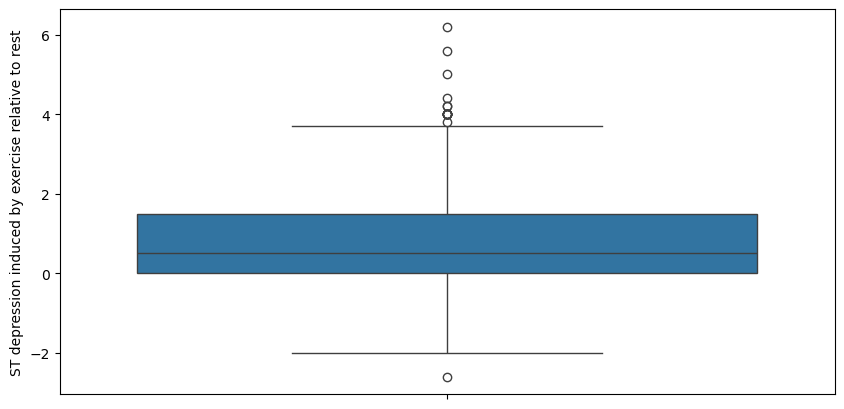

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(df_clean['ST depression induced by exercise relative to rest'])
plt.show()

# Handling Missing Values

In [12]:
df_clean.isna().sum()

Age                                                    0
Sex                                                    0
Chest pain type                                        0
Resting blood pressure                                 0
Cholestrol Measure                                     0
(Fasting Blood sugar > 120 mg/dl)                      0
ECG                                                    0
Maximum Heart Rate Achieved                            0
Exercise Induced Angina                                0
ST depression induced by exercise relative to rest    62
Peak Exercise ST Segment                               0
Thal                                                   0
Num                                                    0
dtype: int64

In [13]:
df_clean.fillna(df_clean['ST depression induced by exercise relative to rest'].median(),inplace=True)

In [14]:
df_clean.duplicated().sum()

1

In [15]:
df_clean.drop_duplicates(inplace=True)

# Visualizations

# Boxplot

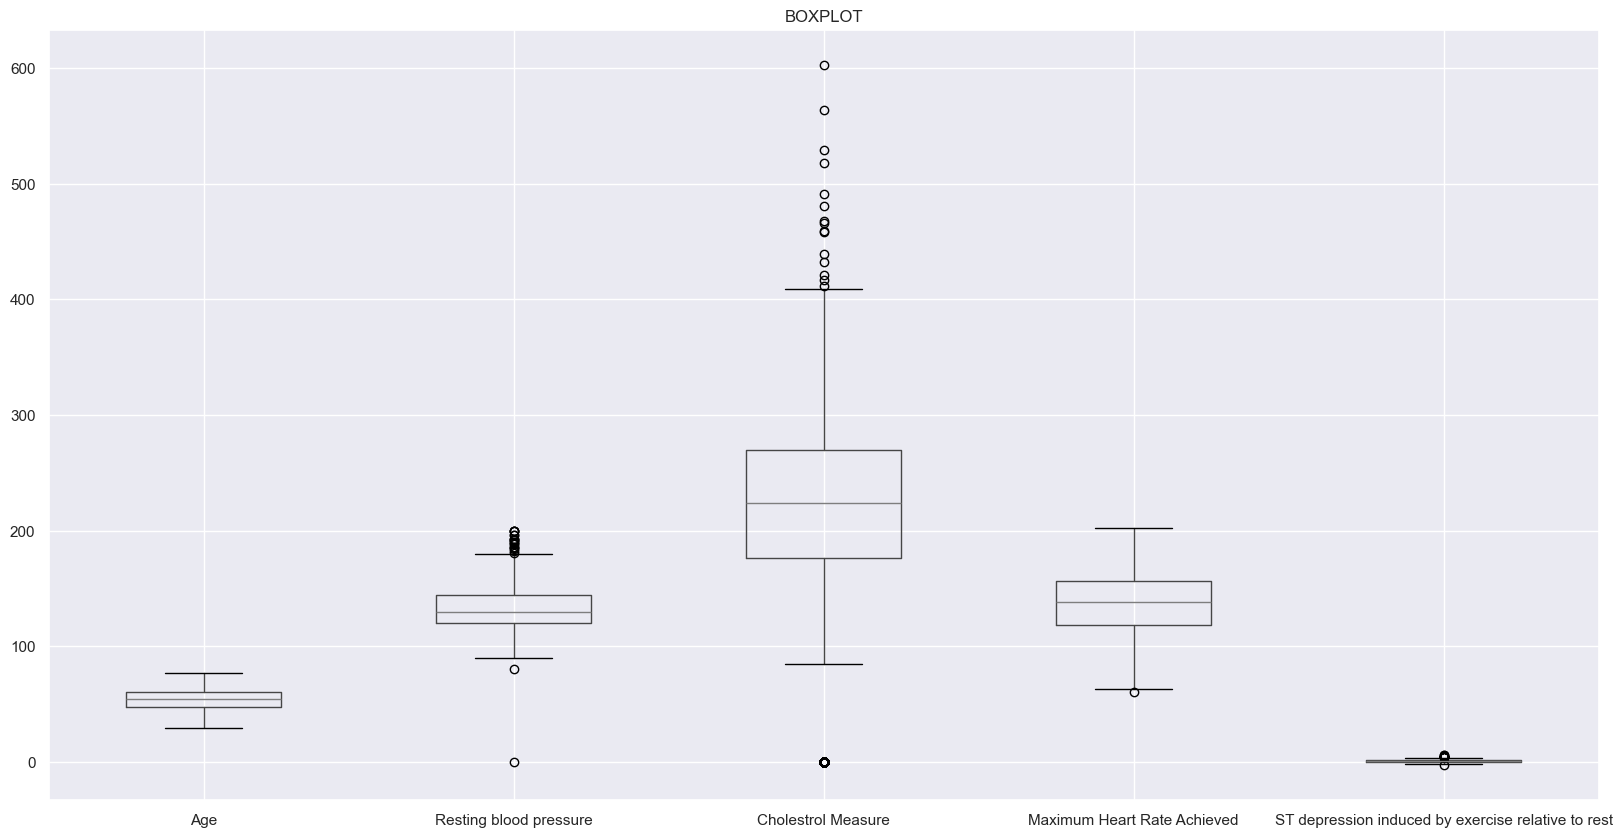

In [16]:
sns.set_theme(style='darkgrid',palette='viridis')
plt.figure(figsize=(20,10))
df_clean.boxplot(column=['Age','Resting blood pressure','Cholestrol Measure','Maximum Heart Rate Achieved','ST depression induced by exercise relative to rest'])
plt.title('BOXPLOT')
plt.show()

# Box plot for categorical variables

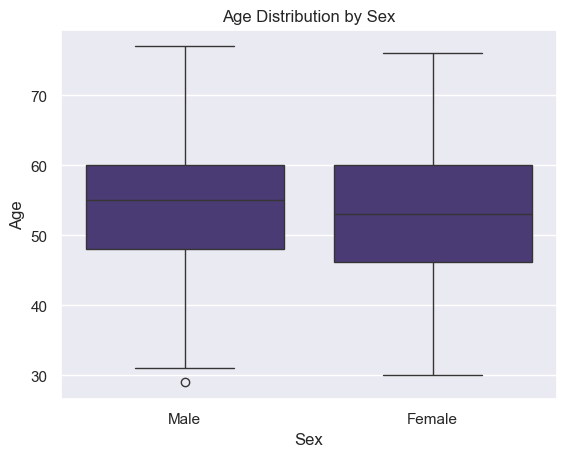

In [17]:
sns.boxplot(x = 'Sex',y = 'Age',data = df_clean)
plt.title('Age Distribution by Sex')
plt.show()

# Handling Outliers

In [18]:
def Outlier(data,column):
    for col in column:
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        IQR = q3 - q1
        Low_Ext = q1 - (1.5*IQR)
        Upp_Ext = q3 + (1.5*IQR)
        df_clean[col] = np.where(df_clean[col]>Upp_Ext,Upp_Ext,np.where(df_clean[col]<Low_Ext,Low_Ext,df_clean[col]))

In [19]:
Outlier(df_clean,df_clean.iloc[:,3:5])

In [20]:
Outlier(df_clean,df_clean.iloc[:,7:8])

In [21]:
Outlier(df_clean,df_clean.iloc[:,9:10])

# Histogram

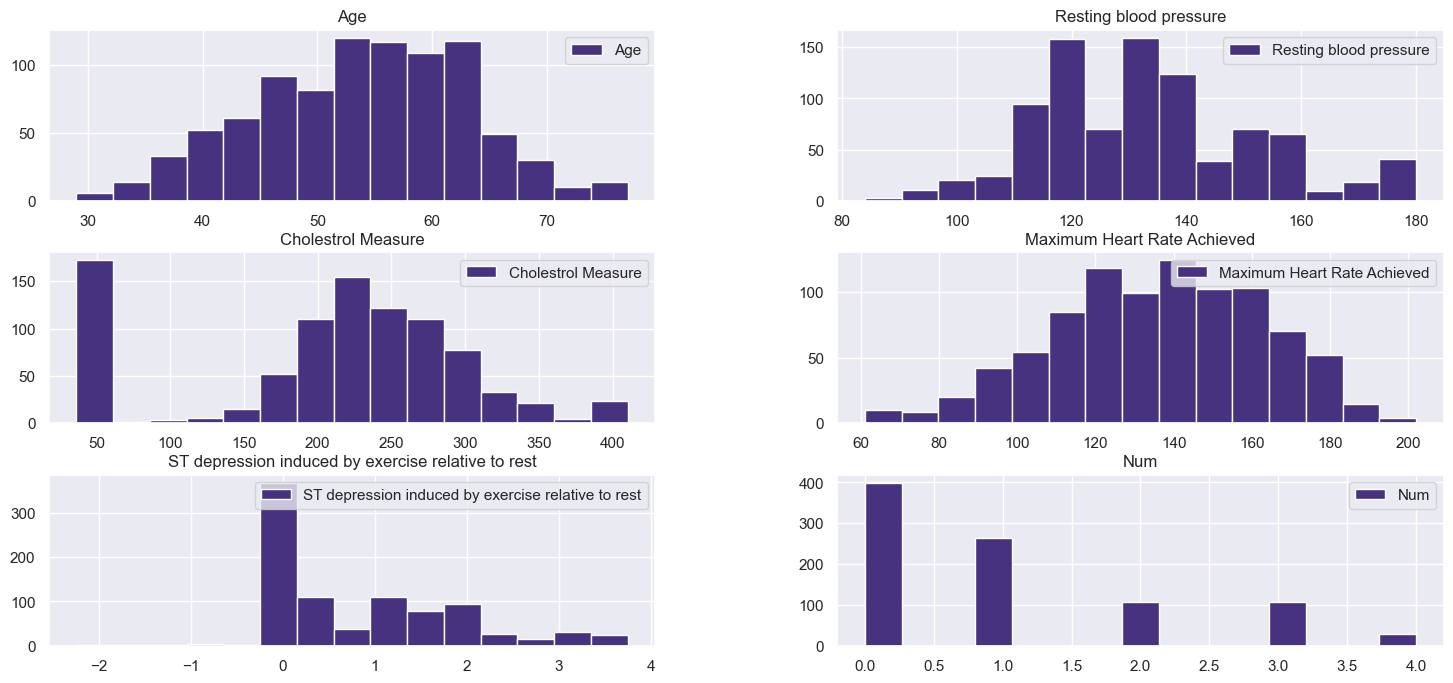

In [22]:
df_clean.hist(column=['Age','Resting blood pressure','Cholestrol Measure','Maximum Heart Rate Achieved',
                      'ST depression induced by exercise relative to rest','Num'],figsize=(18,8),bins=15,legend=True)
plt.show()

# Coorelation Metrics

In [23]:
df_clean.corr(numeric_only=True)

,Age,Resting blood pressure,Cholestrol Measure,(Fasting Blood sugar > 120 mg/dl),Maximum Heart Rate Achieved,ST depression induced by exercise relative to rest,Num
Age,1.000000,0.261741,-0.092618,0.177004,-0.327919,0.221335,0.326227
Resting blood pressure,0.261741,1.000000,0.126318,0.113043,-0.131224,0.142701,0.141934
Cholestrol Measure,-0.092618,0.126318,1.000000,-0.112193,0.194884,0.033985,-0.228771
(Fasting Blood sugar > 120 mg/dl),0.177004,0.113043,-0.112193,1.000000,-0.065856,0.011430,0.156839
Maximum Heart Rate Achieved,-0.327919,-0.131224,0.194884,-0.065856,1.000000,-0.115995,-0.322633
ST depression induced by exercise relative to rest,0.221335,0.142701,0.033985,0.011430,-0.115995,1.000000,0.407176
Num,0.326227,0.141934,-0.228771,0.156839,-0.322633,0.407176,1.000000


<Axes: >

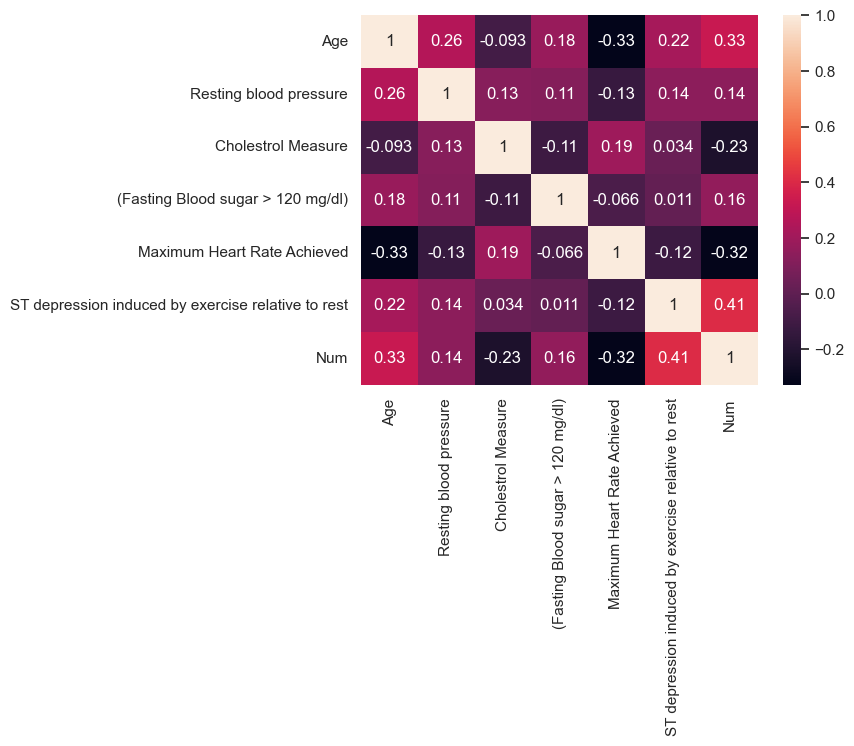

In [24]:
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)

# Pair Plot

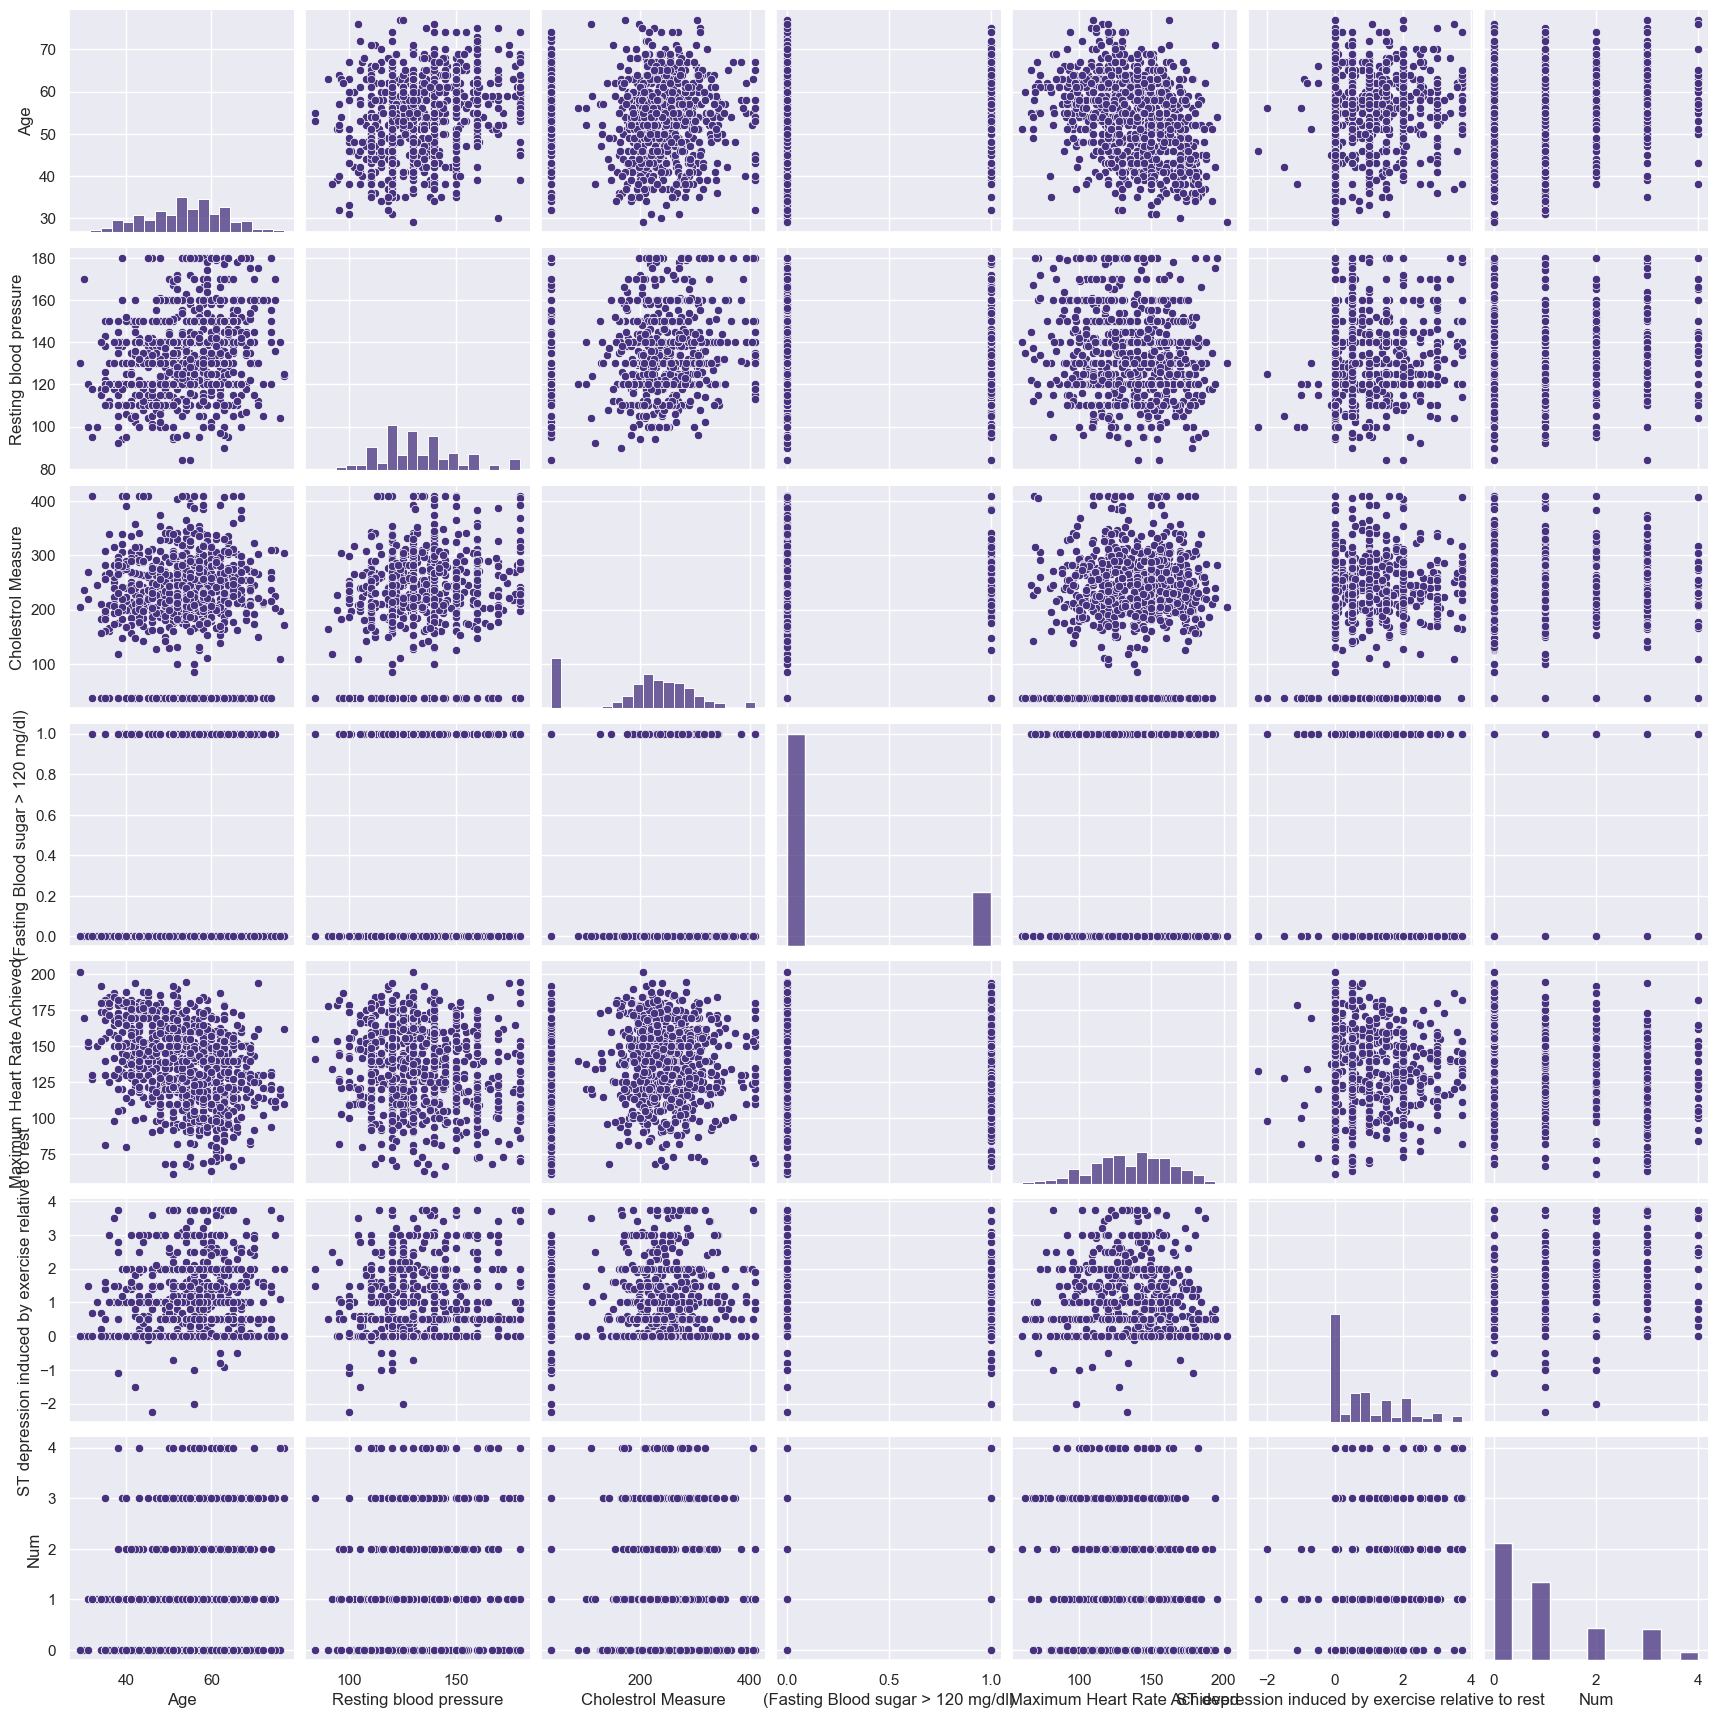

In [25]:
sns.pairplot(df_clean)
plt.show()

# I am deleting column 'ST depression induced by exercise relative to rest' due to low Variance

In [26]:
Low_var_col = df_clean.var(numeric_only=True)
Low_var_col

Age                                                     83.942529
Resting blood pressure                                 372.609817
Cholestrol Measure                                    9437.807084
(Fasting Blood sugar > 120 mg/dl)                        0.162545
Maximum Heart Rate Achieved                            718.774348
ST depression induced by exercise relative to rest       1.050438
Num                                                      1.310095
dtype: float64

In [27]:
df_clean.drop(columns=['ST depression induced by exercise relative to rest'],inplace=True)

# Feature Engineering

In [28]:
df_clean = pd.get_dummies(df_clean,dtype=int)

In [29]:
df_clean['(Fasting Blood sugar > 120 mg/dl)'].dtypes

dtype('bool')

In [30]:
from sklearn import preprocessing

In [31]:
Label_Encoder = preprocessing.LabelEncoder()

In [32]:
df_clean['(Fasting Blood sugar > 120 mg/dl)'] = Label_Encoder.fit_transform(df_clean['(Fasting Blood sugar > 120 mg/dl)'])

# Model Building

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn import tree

In [46]:
x = df_clean.drop(columns=['Num'])

In [47]:
x.head(2)

,Age,Resting blood pressure,Cholestrol Measure,(Fasting Blood sugar > 120 mg/dl),Maximum Heart Rate Achieved,Sex_Female,Sex_Male,Chest pain type_asymptomatic,Chest pain type_atypical angina,Chest pain type_non-anginal,...,Exercise Induced Angina_False,Exercise Induced Angina_True,Exercise Induced Angina_FALSE,Exercise Induced Angina_TURE,Peak Exercise ST Segment_downsloping,Peak Exercise ST Segment_flat,Peak Exercise ST Segment_upsloping,Thal_fixed defect,Thal_normal,Thal_reversable defect
0,63,145.0,233.0,1,150.0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135.0,203.0,0,132.0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [48]:
y = df_clean['Num']

In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: Num, Length: 907, dtype: int64

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
TreeClassifier = DecisionTreeClassifier()

In [52]:
TreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier()

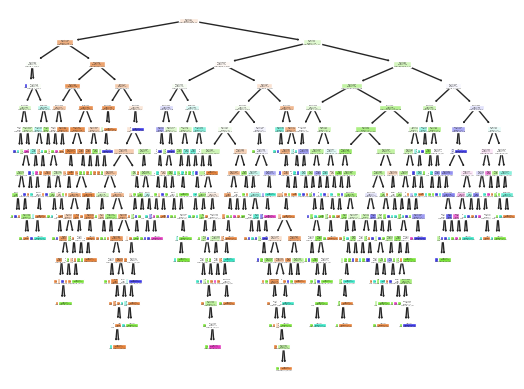

In [53]:
tree.plot_tree(TreeClassifier,filled=True)
plt.show()

In [54]:
y_pred = TreeClassifier.predict(x_test)

# Evaluation

In [55]:
y_probs = TreeClassifier.predict_proba(x_test)

In [56]:
Roc_Auc_Score = roc_auc_score(y_test,y_probs,multi_class='ovr')

In [57]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('ROC_AUC_Score:-',Roc_Auc_Score)

              precision    recall  f1-score   support

           0       0.72      0.71      0.72        89
           1       0.31      0.36      0.34        47
           2       0.21      0.15      0.18        20
           3       0.16      0.24      0.19        17
           4       0.00      0.00      0.00         9

    accuracy                           0.48       182
   macro avg       0.28      0.29      0.28       182
weighted avg       0.47      0.48      0.47       182

[[63 18  2  4  2]
 [15 17  7  8  0]
 [ 3  8  3  6  0]
 [ 4  8  1  4  0]
 [ 2  3  1  3  0]]
ROC_AUC_Score:- 0.5715988168160606


# Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameter = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,10],'max_features':['sqrt','log2']}

In [60]:
Final_model = GridSearchCV(TreeClassifier,param_grid=parameter,scoring='neg_mean_squared_error')

In [61]:
Final_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [62]:
Final_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [63]:
TreeClassifier1 = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features='sqrt',splitter='best')

In [64]:
TreeClassifier1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

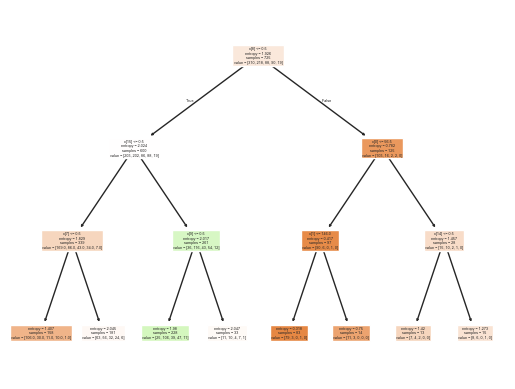

In [65]:
tree.plot_tree(TreeClassifier1,filled=True)
plt.show()

In [66]:
Y = TreeClassifier1.predict(x_test)

# Model Evaluation and Analysis

In [68]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test,Y))
print(confusion_matrix(y_test,Y))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75        89
           1       0.43      0.49      0.46        47
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.21      0.28      0.24       182
weighted avg       0.42      0.58      0.49       182

[[82  7  0  0  0]
 [24 23  0  0  0]
 [ 8 12  0  0  0]
 [ 9  8  0  0  0]
 [ 6  3  0  0  0]]


# Interview Questions